**Trabalho 1 - C213**  
**Grupo 4 (função de transferência 4)** 
   
`Integrante`: Diego Anestor Coutinho  
`Integrante`: Paulo Henrique Lopes Júnior  

In [1]:
# Importação dos requisitos de controle
import control as cnt
import numpy as np

In [2]:
# Visualização da função de transferência
from ipywidgets import FloatText
import matplotlib.pyplot as plt
import seaborn as sns

# Lida com estilo do seaborn
sns.set_style("whitegrid")
sns.set_palette("viridis")

In [3]:
# Entrada de parâmetros dos valores de k, tau e theta encontrados
k = FloatText(description='K:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})
tau = FloatText(description='Tau:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})
theta = FloatText(description='Theta:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})

display(k, tau, theta)

FloatText(value=0.0, description='K:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Tau:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Theta:', style=DescriptionStyle(description_width='initial'))

In [4]:
# Entrada de parâmetros do controlador (Método ZN)
kp = FloatText(description='Kp:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})
ti = FloatText(description='Ti:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})
td = FloatText(description='Td:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})

display(kp, ti, td)

FloatText(value=0.0, description='Kp:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Td:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Ti:', style=DescriptionStyle(description_width='initial'))

In [5]:
# Entrada de parâmetros do controlador (Método CH)
kpCH = FloatText(description='kpCH:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})
tiCH = FloatText(description='TiCH:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})
tdCH = FloatText(description='TdCH:', style={'description_width': 'initial'}, layout={'background-color': 'transparent'})

display(kpCH, tiCH, tdCH)

FloatText(value=0.0, description='kpCH:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='TiCH:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='TdCH:', style=DescriptionStyle(description_width='initial'))

In [6]:
k = k.value
tau = tau.value
theta = theta.value

k, tau, theta

(4.0, 8.25, 3.3)

In [7]:
kp = kp.value
td = td.value
ti = ti.value

kp, td, ti

(0.75, 1.65, 6.6)

In [8]:
kpCH = kpCH.value
tiCH = tiCH.value
tdCH = tdCH.value

kpCH, tiCH, tdCH

(0.9, 7.12, 1.137)

In [9]:
# Importação da função de transferência
from scipy.io import loadmat

# Carregamento das funções e dados
mat = loadmat('./TransferFunctions/TransferFunction4.mat')

# Variáveis
step = mat.get('degrau')
output = mat.get('saida')
time = mat.get('t')

In [10]:
# escrevendo a função de transferência da planta (REALIMENTACAO)
num = np. array([k])
den = np. array([tau, 1])
H = cnt.tf(num, den)

n_pade = 20  # atraso utilizado na transformada de Pade

(num_pade, den_pade) = cnt.pade(theta, n_pade)
H_pade = cnt.tf(num_pade, den_pade)

HsFB = cnt.feedback(H, 1)
Hs = cnt.series(H, H_pade)  # funcao calculada
HsFBS = cnt.series(HsFB, H_pade) * 4  # funcao retroalimentada

In [11]:
# CONSTRUINDO PID
# Controlador proporcional ZN
numkp = np.array([kp])
denkp = np.array([1])
# integral
numki = np.array([kp])
denki = np.array([ti, 0])
# derivativo
numkd = np.array([kp*td, 0])
denkd = np.array([1])


In [12]:
# Controlador proporcional COHEN
numkpCH = np.array([kpCH])
denkpCH = np.array([1])
# integral
numkiCH = np.array([kpCH])
denkiCH = np.array([tiCH, 0])
# derivativo
numkdCH = np.array([kpCH*tdCH, 0])
denkdCH = np.array([1])


In [13]:
# Construindo o controlador PID ZN
Hkp = cnt.tf(numkp, denkp)
Hki = cnt.tf(numki, denki)
Hkd = cnt.tf(numkd, denkd)
Hctrl1 = cnt.parallel(Hkp, Hki)
Hctrl = cnt.parallel(Hctrl1, Hkd)
HdelZN = cnt.series(Hs, Hctrl)


In [14]:
# Construindo o controlador PID CH
HkpCH = cnt.tf(numkpCH, denkpCH)
HkiCH = cnt.tf(numkiCH, denkiCH)
HkdCH = cnt.tf(numkdCH, denkdCH)
Hctrl1CH = cnt.parallel(HkpCH, HkiCH)
HctrlCH = cnt.parallel(Hctrl1CH, HkdCH)
HdelCH = cnt.series(Hs, HctrlCH)


In [15]:
# Fazendo a realimentação
Hclzn = cnt.feedback(HdelZN, 1)*4
HclCH = cnt.feedback(HdelCH, 1)*4

t = np . linspace(0, 50, 100)
(t, y) = cnt.step_response(Hs * 4, t)  # aplica o degrau para resposta estimada
(ths, yhs) = cnt.step_response(HsFBS, t)
(tpidzn, ypidzn) = cnt.step_response(Hclzn, t)
(tpidCH, ypidCH) = cnt.step_response(HclCH, t)


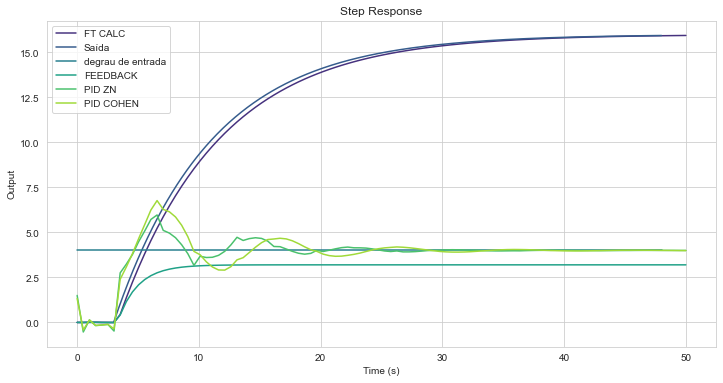

In [16]:
# Plot the results
plt.figure(figsize=(12, 6))

# resposta estimada (Questão 3) - > Calcular erro
plot0 = plt.plot(t, y, label='FT CALC')

# resposta original -> Calcular erro
plot1 = plt.plot(time.T, output, label='Saída')
plot2 = plt.plot(time.T, step, label='degrau de entrada')

# (Questão 4 - malha fechada) -> Calcular erro
plot4 = plt.plot(ths, yhs, label='FEEDBACK')
plot3 = plt.plot(tpidzn, ypidzn, label='PID ZN')  # Questão 5
plot3 = plt.plot(tpidCH, ypidCH, label='PID COHEN')  # questão 5

# Legendas
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step Response')
plt.legend()
plt.show()


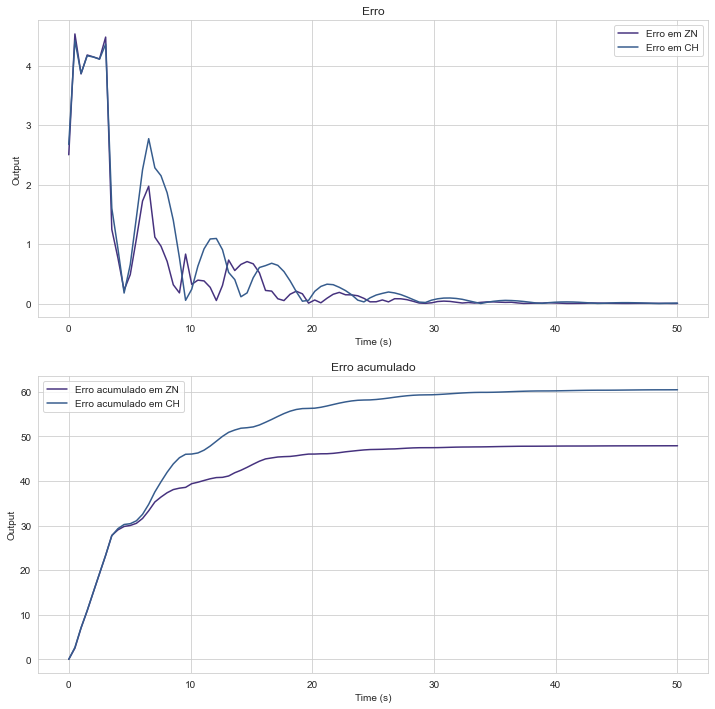

In [30]:
error_zn = np.array([abs(x - 4) for x in ypidzn])
error_ch = np.array([abs(x - 4) for x in ypidCH])

acc_error_zn = np.array([sum(error_zn[:i]) for i in range(len(error_zn))])
acc_error_ch = np.array([sum(error_ch[:i]) for i in range(len(error_ch))])

# Plot the results
plt.figure(figsize=(12, 12))

# subplot 1
plt.subplot(2, 1, 1)
plt.plot(tpidzn, error_zn, label='Erro em ZN')  # Questão 5
plt.plot(tpidCH, error_ch, label='Erro em CH')  # Questão 5
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Erro')
plt.legend()

# subplot 2
plt.subplot(2, 1, 2)
plt.plot(tpidzn, acc_error_zn, label='Erro acumulado em ZN')  # Questão 5
plt.plot(tpidCH, acc_error_ch, label='Erro acumulado em CH')  # Questão 5
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Erro acumulado')
plt.legend()

plt.show()